In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [103]:
df = pd.read_csv("winemag-data_first150k.csv")

In [104]:
df = df.drop("Unnamed: 0", axis=1)
mask = pd.notnull(df.country)
mask2 = pd.notnull(df.price)

In [110]:
clean_df = df.loc[mask & mask2].reset_index(drop=True)
clean_df['designation'].replace(np.nan,'*Unknown Wine*', inplace=True)
clean_df.loc[clean_df['region_1'].isnull(),'region_1']=clean_df['province']
clean_df.loc[clean_df['region_2'].isnull(),'region_2']=clean_df['region_1']
clean_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
137225,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Feudi di San Gregorio
137226,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne,Champagne Blend,H.Germain
137227,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Terredora
137228,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne,Champagne Blend,Gosset


In [111]:
clean_df.country.value_counts()

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [112]:
top10 = clean_df.country.value_counts()[0:10].sort_values(ascending=True)

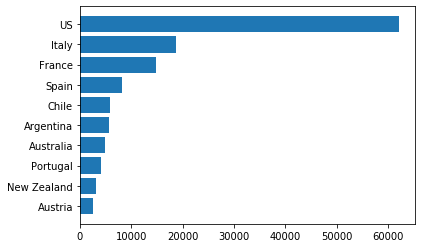

In [113]:
#This bar graph shows the number of wine by top 10 countries
plt.barh(top10.index, top10.values)
plt.show()

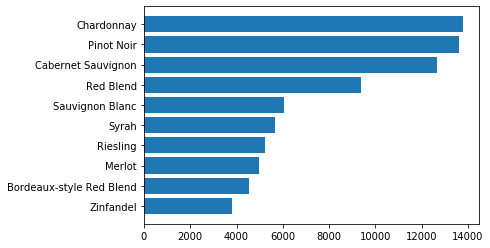

Chardonnay             13775
Pinot Noir             13625
Cabernet Sauvignon     12671
Red Blend               9377
Sauvignon Blanc         6054
                       ...  
Kuntra                     1
Cabernet-Shiraz            1
Azal                       1
Malbec-Petit Verdot        1
Silvaner-Traminer          1
Name: variety, Length: 619, dtype: int64


In [114]:
#Top 10 variety of wines in the dataset
variety10 = clean_df.variety.value_counts()[0:10].sort_values(ascending=True)
plt.barh(variety10.index, variety10.values)
plt.show()

#All variety counts
counts = clean_df.variety.value_counts()
print(counts)

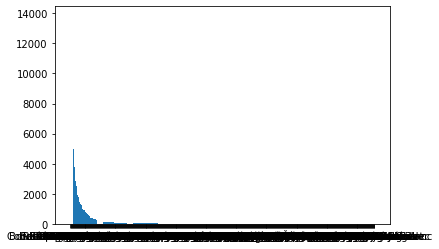

In [115]:
plt.bar(counts.index, counts.values)
plt.show()

In [116]:
reds = pd.read_csv('Wine_Reds.csv').dropna()
reds = reds.rename(columns = {"Variety":"variety"})

In [117]:
temp = pd.merge(clean_df,reds,on = "variety", how = "left")
mask5 = pd.notnull(temp["Red?"])
wine_df = temp.loc[mask5].reset_index(drop=True)

In [118]:
wine_df['Still_Red'] = wine_df['Red?'].astype(int)

In [119]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,221.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne,Champagne Blend,Gosset,1003.0,False,0


In [120]:
#Red wines produced per country
mask_red = wine_df.Still_Red == 1
wine_red = wine_df.loc[mask_red]
wine_red.country.value_counts()

US                44550
Italy             13365
France             8021
Spain              6510
Argentina          4735
Chile              4060
Australia          3314
Portugal           2982
Austria            1620
South Africa       1277
New Zealand        1129
Greece              513
Israel              470
Germany             192
Hungary              80
Uruguay              72
Romania              64
Canada               61
Moldova              42
Mexico               42
Bulgaria             42
Slovenia             25
Brazil               24
Lebanon              23
Cyprus               23
Turkey               22
Croatia              16
Lithuania             8
Georgia               7
Morocco               7
England               6
Macedonia             6
Ukraine               4
India                 4
Serbia                3
Switzerland           2
Czech Republic        2
Name: country, dtype: int64

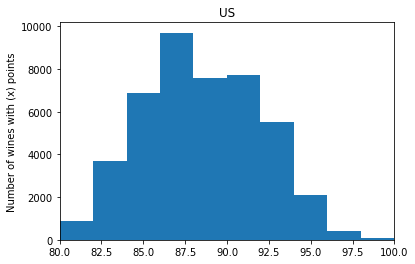

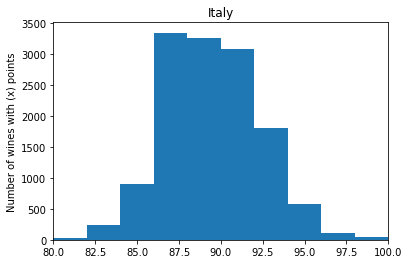

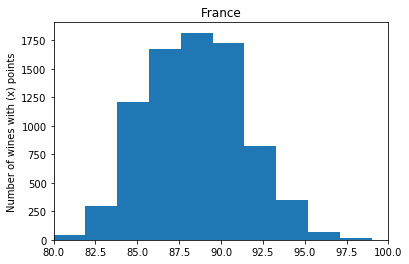

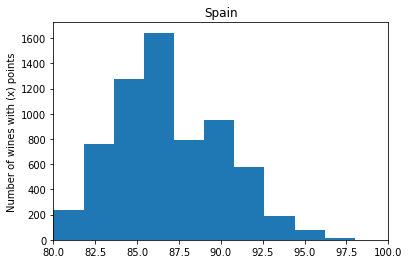

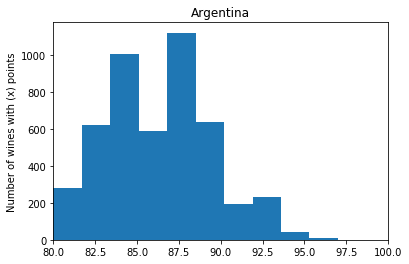

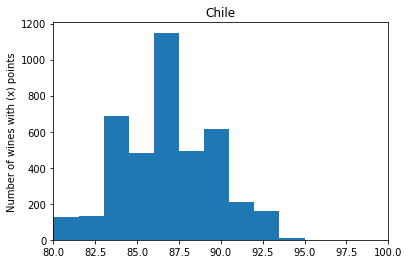

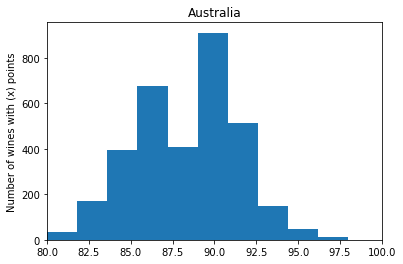

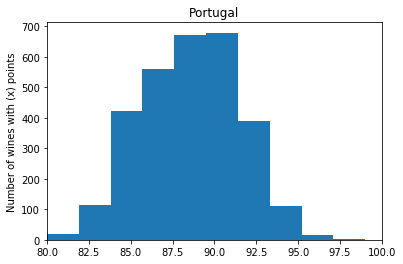

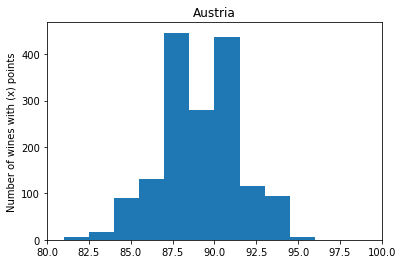

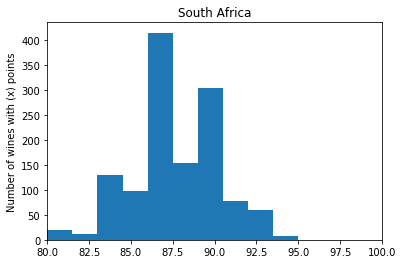

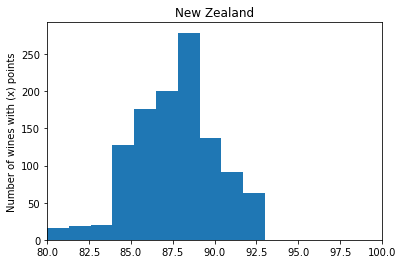

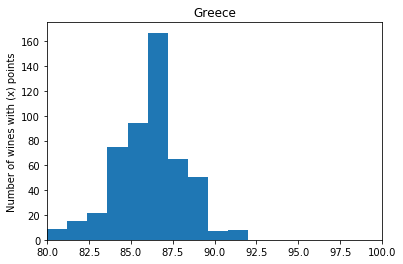

In [121]:
#Plot top 12 red wine producing countries
for country in wine_red.country.value_counts().index[0:12]:
    mask6 = wine_red.country == country 
    red_wine = wine_red.loc[mask6]
    
    plt.hist(red_wine.points, bins = 10)
    plt.xlim(80,100)
    plt.title(country)
    plt.ylabel("Number of wines with (x) points")
    plt.show()

In [122]:
#Dataframe sorted by Wine type: red
mask8 = wine_red.country.isin(wine_red.country.value_counts().head(13).index)
red2 = wine_red.loc[mask8]
red2

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Toro,Tinta de Toro,Maurodos,221.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134269,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,Nuits-St.-Georges,Pinot Noir,Daniel Rion,13625.0,True,1
134270,France,Scents of graham cracker and malted milk choco...,*Unknown Wine*,89,38.0,Burgundy,Chambolle-Musigny,Chambolle-Musigny,Pinot Noir,Michel Gros,13625.0,True,1
134271,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,Nuits-St.-Georges,Pinot Noir,Michel Gros,13625.0,True,1
134272,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,Chambolle-Musigny,Pinot Noir,Daniel Rion,13625.0,True,1


In [123]:
#Top 13 countries withcounts of red wine produced
mask8 = wine_red.country.isin(wine_red.country.value_counts().head(13).index)
red2 = wine_red.loc[mask8]
red2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12671.0,True,1
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Toro,Tinta de Toro,Maurodos,221.0,True,1


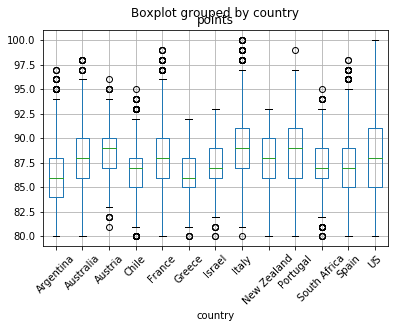

In [124]:
#Top 13 Countries by avg points for red whine produced
red2.boxplot(column = 'points', by = 'country', rot = 45)
plt.show()

In [125]:
#white wine produced by country
mask_white = wine_df.Still_Red == 0
wine_white = wine_df.loc[mask_white]
wine_white.country.value_counts()

US                17021
France             6467
Italy              4785
Germany            2109
New Zealand        1936
Chile              1626
Australia          1500
Spain              1217
Portugal            926
South Africa        920
Argentina           800
Austria             750
Greece              290
Israel              128
Canada              120
Hungary             116
Romania              57
Slovenia             46
Bulgaria             25
Moldova              25
Croatia              20
Mexico               18
Lebanon              13
Uruguay              10
Luxembourg            9
Georgia               5
India                 4
Morocco               4
Slovakia              3
China                 3
England               2
Serbia                2
Turkey                2
Cyprus                2
US-France             1
Czech Republic        1
Brazil                1
Ukraine               1
Switzerland           1
Name: country, dtype: int64

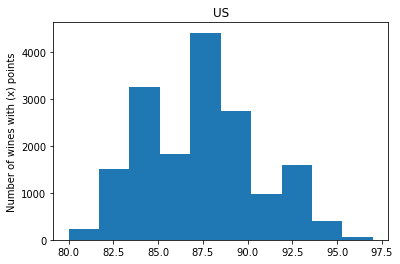

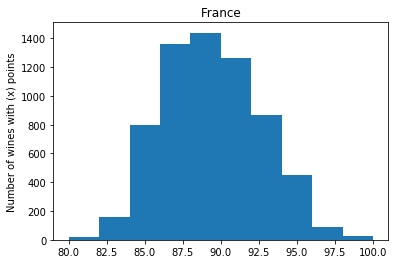

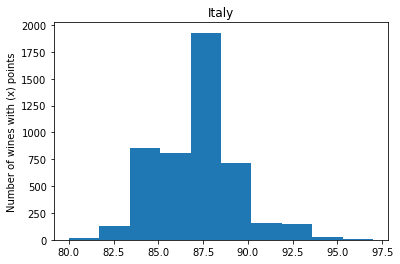

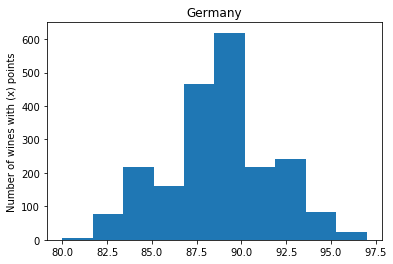

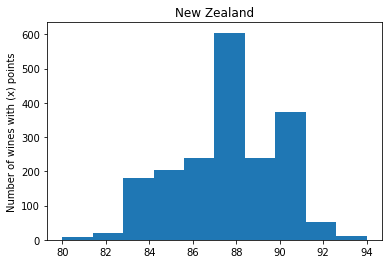

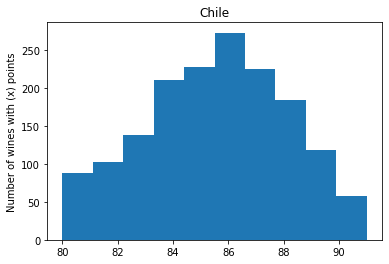

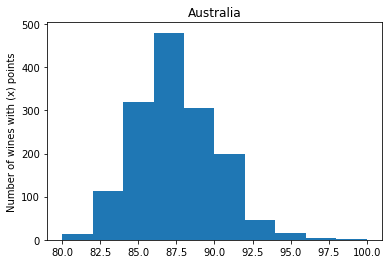

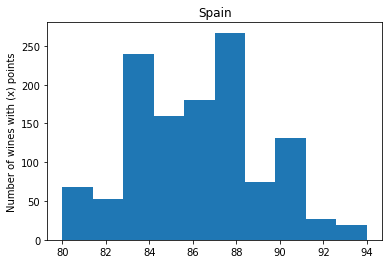

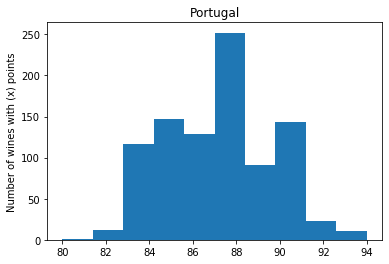

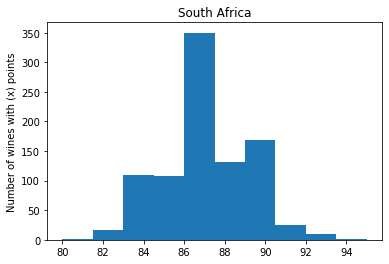

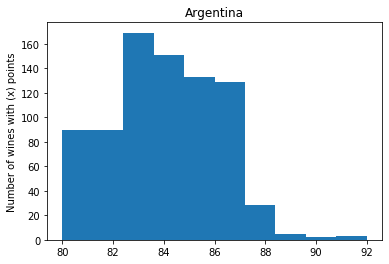

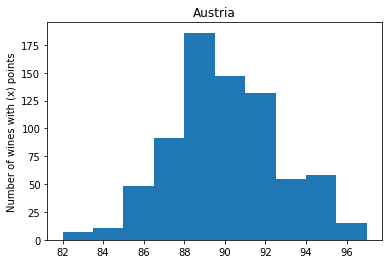

In [126]:
#Plot top 12 white wine producing countries
for country in wine_white.country.value_counts().index[0:12]:
    mask7 = wine_white.country == country 
    white_wine = wine_white.loc[mask7]
    
    plt.hist(white_wine.points, bins = 10)
    plt.title(country)
    plt.ylabel("Number of wines with (x) points")
    plt.show()

In [127]:
mask9 = wine_white.country.isin(wine_white.country.value_counts().index[0:12])
white2 = wine_white.loc[mask9]
white2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
14,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,13775.0,False,0
22,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,13775.0,False,0
24,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,Kumeu,Kumeu,Chardonnay,Kumeu River,13775.0,False,0
29,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,13775.0,False,0


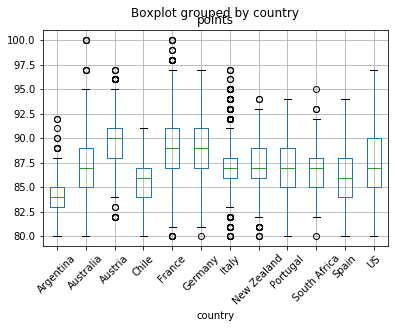

In [128]:
#Top 13 Countries by avg points for white whine produced
white2.boxplot(column = 'points', by = 'country', rot = 45)
plt.show()

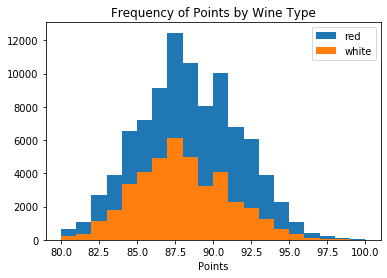

In [129]:
#Wine color corresponding to amount of times scored for certain value (80-100)
plt.hist(wine_red.points, label = "red", bins = 20)
plt.hist(wine_white.points, label = 'white', bins = 20)
plt.title ('Frequency of Points by Wine Type')
plt.xlabel('Points')
plt.legend()
plt.show()

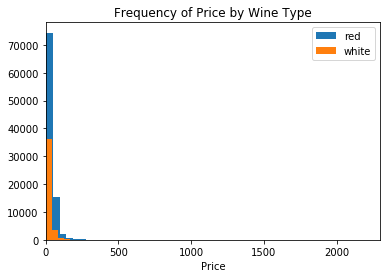

In [130]:
# Number of times that a value ('price') appears in dataframe for both red and white wine
plt.hist(wine_red.price, label = "red", bins = 50)
plt.hist(wine_white.price, label = 'white', bins = 50)
plt.title ('Frequency of Price by Wine Type')
plt.xlim(0,wine_red.price.max())
plt.xlabel('Price')
plt.legend()
plt.show()

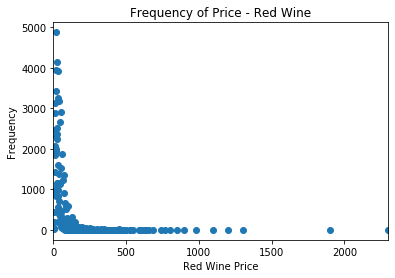

In [131]:
# Number of times that a value ('price') appears in dataframe for red wine
plt.scatter(wine_red.price.value_counts().index, wine_red.price.value_counts().values)
plt.title ('Frequency of Price - Red Wine')
plt.xlim(0,wine_red.price.max())
plt.xlabel('Red Wine Price')
plt.ylabel('Frequency')
plt.show()

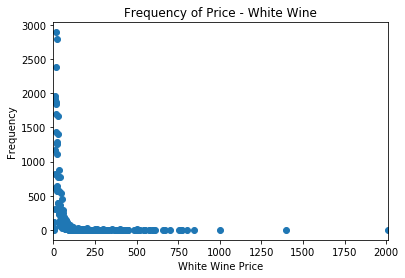

In [132]:
# Number of times that a value ('price') appears in dataframe for white wine
plt.scatter(wine_white.price.value_counts().index, wine_white.price.value_counts().values)
plt.title ('Frequency of Price - White Wine')
plt.xlim(0,wine_white.price.max())
plt.xlabel('White Wine Price')
plt.ylabel('Frequency')
plt.show()

In [133]:
wine_red.price.max()

2300.0

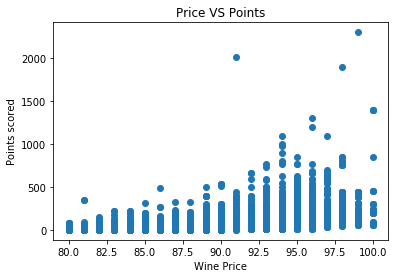

In [134]:
plt.scatter(wine_df.points, wine_df.price)
plt.title ('Price VS Points')
plt.xlabel('Wine Price')
plt.ylabel('Points scored')
plt.show()

In [135]:
z = np.abs(stats.zscore(wine_df.price))
print(z)

[5.5162092  2.09730684 1.55028246 ... 0.36430286 0.51093614 0.50105896]


In [31]:
threshold = 3
np.where(z>3)

(array([     0,     13,     15, ..., 132640, 132692, 133928], dtype=int64),)

In [33]:
print(z[0],z[14])

5.5162091978018974 1.5502824596649218


In [36]:
#Interquantile range of all quantifiable columns
Q1 = wine_df.quantile(0.05)
Q3 = wine_df.quantile(0.95)
IQR = Q3-Q1
IQR

points          10.0
price           70.0
Counts       13623.0
Still_Red        1.0
dtype: float64

In [37]:
print(wine_df > (Q1 - 1.5*IQR)) | (wine_df < (Q3 + 1.5*IQR))

        Counts   Red?  Still_Red  country  description  designation  points  \
0         True  False       True    False        False        False    True   
1         True  False       True    False        False        False    True   
2         True  False       True    False        False        False    True   
3         True  False       True    False        False        False    True   
4         True  False       True    False        False        False    True   
...        ...    ...        ...      ...          ...          ...     ...   
134284    True  False       True    False        False        False    True   
134285    True  False       True    False        False        False    True   
134286    True  False       True    False        False        False    True   
134287    True  False       True    False        False        False    True   
134288    True  False       True    False        False        False    True   

        price  province  region_1  region_2  variet

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [136]:
#Outliers removed df
priceZ = wine_df[~((wine_df < (Q1 - 1.5 * IQR)) |(wine_df > (Q3 + 1.5 * IQR))).any(axis=1)]
priceZ

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,221.0,True,1
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6054.0,False,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Toro,Tinta de Toro,Maurodos,221.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne,Champagne Blend,Gosset,1003.0,False,0


In [40]:
wine_df[['price','points','Still_Red']].corr()

,price,points,Still_Red
price,1.000000,0.459624,0.108498
points,0.459624,1.000000,0.061808
Still_Red,0.108498,0.061808,1.000000


In [41]:
stats.ttest_ind(wine_red.points, wine_white.points, equal_var=False)

Ttest_indResult(statistic=23.349294596442785, pvalue=3.4024913851525474e-120)

In [42]:
wine_red.points.mean()

87.93201032971507

In [43]:
wine_white.points.mean()

87.49904799101694

In [44]:
wine_red.points.count()

93323

In [45]:
wine_white.points.count()

40966

In [46]:
stats.sem(wine_red.points)

0.01076380993151733

In [47]:
stats.sem(wine_white.points)

0.015098923061268945

In [48]:
stats.ttest_ind(wine_red.price, wine_white.price, equal_var=False)

Ttest_indResult(statistic=39.55164412347694, pvalue=0.0)

In [49]:
print(wine_red.price.mean())
print(wine_white.price.mean())
print(stats.sem(wine_red.price))
print(stats.sem(wine_white.price))

35.947665634409525
27.332177903627397
0.11792129941087051
0.18315010059964076


(array([9.2937e+04, 3.3400e+02, 3.7000e+01, 8.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   4. ,  233.6,  463.2,  692.8,  922.4, 1152. , 1381.6, 1611.2,
        1840.8, 2070.4, 2300. ]),
 <a list of 10 Patch objects>)

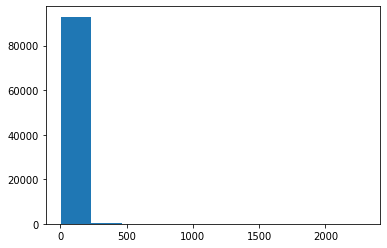

In [50]:
plt.hist(wine_red.price)

In [51]:
np.quantile(wine_red.price, 0.975)

110.0

In [52]:
new_mask = (wine_red.price > np.quantile(wine_red.price, 0.025)) & (wine_red.price < np.quantile(wine_red.price, 0.975))

red_sub = wine_red.loc[new_mask]
red_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Toro,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134269,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,Nuits-St.-Georges,Pinot Noir,Daniel Rion,13625.0,True,1
134270,France,Scents of graham cracker and malted milk choco...,*Unknown Wine*,89,38.0,Burgundy,Chambolle-Musigny,Chambolle-Musigny,Pinot Noir,Michel Gros,13625.0,True,1
134271,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,Nuits-St.-Georges,Pinot Noir,Michel Gros,13625.0,True,1
134272,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,Chambolle-Musigny,Pinot Noir,Daniel Rion,13625.0,True,1


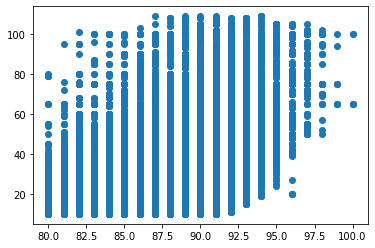

In [53]:
plt.scatter(red_sub.points, red_sub.price)

In [54]:
red_sub.corr()

,points,price,Counts,Still_Red
points,1.000000,0.538650,0.081764,NaN
price,0.538650,1.000000,0.207736,NaN
Counts,0.081764,0.207736,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [55]:
wine_red.corr()

,points,price,Counts,Still_Red
points,1.000000,0.474773,0.089191,NaN
price,0.474773,1.000000,0.127757,NaN
Counts,0.089191,0.127757,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [56]:
red_sub.price.mean()

32.84124487004104

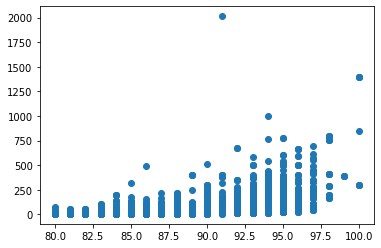

In [57]:
plt.scatter(wine_white.points, wine_white.price)

In [58]:
new_mask2 = (wine_white.price > np.quantile(wine_white.price, 0.025)) & (wine_white.price < np.quantile(wine_white.price, 0.975))

white_sub = wine_white.loc[new_mask2]
white_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
22,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,13775.0,False,0
24,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,Kumeu,Kumeu,Chardonnay,Kumeu River,13775.0,False,0
29,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,13775.0,False,0
31,US,"The aromas entice with notes of wet stone, hon...",Conner Lee Vineyard,90,42.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Buty,13775.0,False,0
33,France,Gingery spice notes accent fresh pear and melo...,*Unknown Wine*,90,60.0,Rhône Valley,Châteauneuf-du-Pape,Châteauneuf-du-Pape,Rhône-style White Blend,Clos de L'Oratoire des Papes,407.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne,Champagne Blend,Gosset,1003.0,False,0


In [59]:
white_sub.corr()

,points,price,Counts,Still_Red
points,1.000000,0.536413,0.040876,NaN
price,0.536413,1.000000,0.173914,NaN
Counts,0.040876,0.173914,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [60]:
wine_white.corr()

,points,price,Counts,Still_Red
points,1.000000,0.414576,0.043053,NaN
price,0.414576,1.000000,0.076988,NaN
Counts,0.043053,0.076988,1.000000,NaN
Still_Red,NaN,NaN,NaN,NaN


In [61]:
white_sub.price.mean()

23.84170440510498

In [62]:
wine_sub = red_sub.append(white_sub)
wine_sub

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Counts,Red?,Still_Red
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,13625.0,True,1
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,221.0,True,1
5,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Toro,Tinta de Toro,Maurodos,221.0,True,1
7,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,13625.0,True,1
8,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,13625.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134284,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Feudi di San Gregorio,2554.0,False,0
134285,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne,Champagne Blend,H.Germain,1003.0,False,0
134286,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,Fiano di Avellino,White Blend,Terredora,2554.0,False,0
134287,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne,Champagne Blend,Gosset,1003.0,False,0


In [63]:
wine_sub.corr()

,points,price,Counts,Still_Red
points,1.000000,0.535937,0.066897,0.070902
price,0.535937,1.000000,0.184860,0.222282
Counts,0.066897,0.184860,1.000000,-0.025279
Still_Red,0.070902,0.222282,-0.025279,1.000000


In [64]:
wine_sub.describe()

,points,price,Counts,Still_Red
count,126584.000000,126584.000000,126584.000000,126584.000000
mean,87.767245,30.078193,6363.028124,0.692979
std,3.093177,18.675083,5155.713547,0.461260
min,80.000000,9.000000,30.000000,0.000000
25%,86.000000,16.000000,1455.000000,0.000000
50%,88.000000,25.000000,4987.000000,1.000000
75%,90.000000,39.000000,12671.000000,1.000000
max,100.000000,109.000000,13775.000000,1.000000


In [65]:
mask9 = wine_sub.country.isin(wine_sub.country.value_counts().index[0:9])
top_wines = wine_sub.loc[mask9]
yasmine = top_wines[[ 'points', 'price', 'Still_Red']]
daniel = pd.get_dummies(top_wines.country)

In [66]:
daniel

,Argentina,Australia,Chile,France,Italy,New Zealand,Portugal,Spain,US
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
134284,0,0,0,0,1,0,0,0,0
134285,0,0,0,1,0,0,0,0,0
134286,0,0,0,0,1,0,0,0,0
134287,0,0,0,1,0,0,0,0,0


In [67]:
prof_booth = yasmine.join(daniel)
prof_booth.corr()

,points,price,Still_Red,Argentina,Australia,Chile,France,Italy,New Zealand,Portugal,Spain,US
points,1.000000,0.539262,0.082539,-0.110656,0.008028,-0.087819,0.052769,0.080276,-0.011449,0.041109,-0.079011,0.014230
price,0.539262,1.000000,0.230951,-0.112325,-0.029218,-0.122933,0.024949,0.069351,-0.054175,-0.042771,-0.077625,0.109578
Still_Red,0.082539,0.230951,1.000000,0.068105,-0.008425,0.000460,-0.111275,0.018708,-0.121567,0.023034,0.068709,0.030987
Argentina,-0.110656,-0.112325,0.068105,1.000000,-0.041730,-0.044770,-0.073815,-0.087001,-0.034249,-0.036032,-0.052014,-0.212660
Australia,0.008028,-0.029218,-0.008425,-0.041730,1.000000,-0.042449,-0.069988,-0.082491,-0.032473,-0.034164,-0.049317,-0.201635
Chile,-0.087819,-0.122933,0.000460,-0.044770,-0.042449,1.000000,-0.075088,-0.088501,-0.034839,-0.036653,-0.052910,-0.216326
France,0.052769,0.024949,-0.111275,-0.073815,-0.069988,-0.075088,1.000000,-0.145916,-0.057441,-0.060432,-0.087236,-0.356666
Italy,0.080276,0.069351,0.018708,-0.087001,-0.082491,-0.088501,-0.145916,1.000000,-0.067703,-0.071227,-0.102819,-0.420380
New Zealand,-0.011449,-0.054175,-0.121567,-0.034249,-0.032473,-0.034839,-0.057441,-0.067703,1.000000,-0.028039,-0.040476,-0.165488
Portugal,0.041109,-0.042771,0.023034,-0.036032,-0.034164,-0.036653,-0.060432,-0.071227,-0.028039,1.000000,-0.042583,-0.174102


In [68]:
import seaborn as sn 

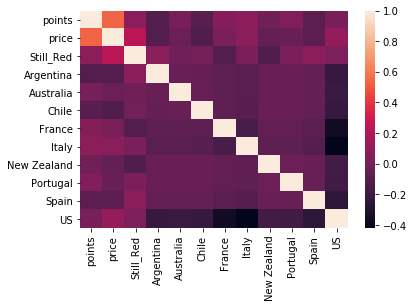

In [69]:
sn.heatmap(prof_booth.corr())

In [70]:
import statsmodels.api as sm

In [71]:
X = prof_booth.drop('price', axis =1)
# X = prof_booth[['points','Still_Red']]
y = prof_booth[["price"]]

In [72]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6336.
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        23:25:41   Log-Likelihood:            -4.8716e+05
No. Observations:              117681   AIC:                         9.744e+05
Df Residuals:                  117670   BIC:                         9.745e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -221.2869      1.141   -193.906      0.000    -223.524    -219.050
points          3.0485      0.015    209.871      0.000       3.020       3.077
Still_Red       8.1038      0.100     81.344      0.000       7.909       8.299
Argentina     -27.9245      0.228   -122.213      0.000     -28.372     -27.477
Australia     -24.6496      0.249    -98.839      0.000     -25.138     -24.161
Chile         -28.6038      0.228   -125.435      0.000     -29.051     -28.157
France        -20.5781      0.192   -107.151      0.000     -20.955     -20.202
Italy         -20.5101      0.183   -112.063      0.000     -20.869     -20.151
New Zealand   -24.4948      0.286    -85.784      0.000     -25.054     -23.935
Portugal      -29.1171      0.280   -104.169      0.000     -29.665     -28.569
Spain         -25.5453      0.210   -121.641      0.000     -25.957     -25.134
US            -19.8635      0.154   -128.972      0.000     -20.165     -19.562
==============================================================================
Omnibus:                    25897.356   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56353.331
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       5.230   Cond. No.                     8.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

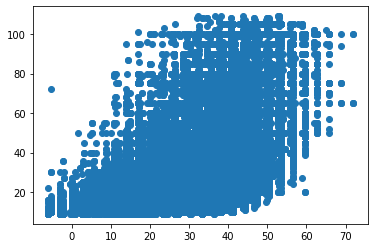

In [73]:
plt.scatter(predictions, y)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
# Labels are the values we want to predict
labels = np.array(prof_booth['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= prof_booth.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [78]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [79]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [80]:
rf.score(test_features, test_labels)

0.4251721003464957

In [81]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 10.23 dollars.


In [82]:
list(zip(feature_list, rf.feature_importances_))

[('points', 0.7815691539888602),
 ('Still_Red', 0.0908328319458858),
 ('Argentina', 0.00289929825026991),
 ('Australia', 0.0018356456300703036),
 ('Chile', 0.0037002461583432425),
 ('France', 0.028891007387623516),
 ('Italy', 0.02504440892607178),
 ('New Zealand', 0.0020789918711532004),
 ('Portugal', 0.004441179240846912),
 ('Spain', 0.0016919607713094232),
 ('US', 0.057015275829565684)]

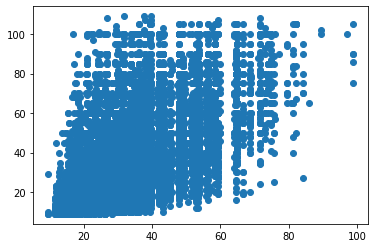

In [83]:
plt.scatter(predictions, test_labels)

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
predictions_lm = lm.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions_lm - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 11.29 dollars.


In [87]:
lm.score(test_features, test_labels)

0.3510499441024

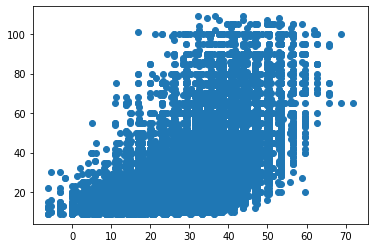

In [88]:
plt.scatter(predictions_lm, test_labels)

In [89]:
list(zip(feature_list,lm.coef_))

[('points', 3.0449997948077945),
 ('Still_Red', 8.158594699633522),
 ('Argentina', -3.2656182483594676),
 ('Australia', -0.12089803833070992),
 ('Chile', -4.0642946390221795),
 ('France', 4.014415566683601),
 ('Italy', 4.071897145721462),
 ('New Zealand', 0.12057232584676728),
 ('Portugal', -4.4662816055056584),
 ('Spain', -1.004889724768368),
 ('US', 4.71509721773456)]

In [90]:
lm.intercept_

-245.59826767669728

In [202]:
#top 10 most expensive wines
top10cost = wine_df.price.sort_values(ascending=False)
top10cost.head(10)

30913    2300.0
12076    2013.0
30915    1900.0
45799    1400.0
73573    1400.0
23306    1400.0
30931    1300.0
30934    1200.0
30920    1100.0
9677     1100.0
Name: price, dtype: float64

In [203]:
#Most expensive wine
top_wine_price = wine_df.iloc[[30913, 12076, 30915]].drop("Counts", axis=1).reset_index(drop=True)

top_wine_price

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Red?,Still_Red
0,France,"A big, powerful wine that sums up the richness...",*Unknown Wine*,99,2300.0,Bordeaux,Pauillac,Pauillac,Bordeaux-style Red Blend,Château Latour,True,1
1,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair,False,0
2,France,"A massive wine for Margaux, packed with tannin...",*Unknown Wine*,98,1900.0,Bordeaux,Margaux,Margaux,Bordeaux-style Red Blend,Château Margaux,True,1


In [91]:
import gmaps
import requests
import json
from pprint import pprint
from api_keys import g_key
import time

In [92]:
#White wine counts per region
reg_Wht = wine_white.province.value_counts().reset_index()
reg_Wht.rename(columns={'index':'province','province': 'white_wine_counts'},inplace=True)
heat_Wht = reg_Wht['province']

In [93]:
#Red wine counts per region
reg_Red = wine_red.province.value_counts().reset_index()
reg_Red.rename(columns={'index':'province','province': 'red_wine_counts'},inplace=True)
heat_Red = reg_Red['province']

In [94]:
red_Heat = wine_red.country.value_counts().reset_index()
red_Heat.rename(columns={'index':'country','country': 'red_wines'},inplace=True)
red_Heat
country_list = red_Heat['country'].tolist()

In [ ]:
lat = []
lng = []

for country in country_list:
    
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={g_key}"
       
    try:
        response = requests.get(url).json()
        status = response['status']
                           
        if status == "OK":
            lat.append(response['results'][0]['geometry']['location']['lat'])
            lng.append(response['results'][0]['geometry']['location']['lng'])
                                  
    except Exception as e:    
        print(e)
time.sleep(1)

In [ ]:
lat1 = []
lng1 = []

for province in heat_Red:
    
    url1 = f"https://maps.googleapis.com/maps/api/geocode/json?address={province}&key={g_key}"
       
    try:
        response1 = requests.get(url1).json()
        
        lat1.append(response1['results'][0]['geometry']['location']['lat'])
        lng1.append(response1['results'][0]['geometry']['location']['lng'])
                                  
    except IndexError as e:    
        print(f"No info found for {province}")
        lat1.append({province})
        lng1.append({province})
time.sleep(1)

In [ ]:
lat2 = []
lng2 = []

for province in heat_Wht:
    
    url1 = f"https://maps.googleapis.com/maps/api/geocode/json?address={province}&key={g_key}"
       
    try:
        response1 = requests.get(url1).json()
        
        lat2.append(response1['results'][0]['geometry']['location']['lat'])
        lng2.append(response1['results'][0]['geometry']['location']['lng'])
                                  
    except IndexError as e:    
        print(f"No info found for {province}")
        lat2.append({province})
        lng2.append({province})
time.sleep(1)

In [95]:
redW_df = pd.read_csv("Red_Wine_Provinces.csv")
redW_df.drop("Unnamed: 0", axis=1,inplace=True)
redW_df.rename(columns= {'longtitude': 'longitude'},inplace=True)
redW_df

,province,red_wine_counts,latitude,longitude
0,California,32247,36.778261,-119.417932
1,Washington,7303,47.751074,-120.740139
2,Tuscany,5542,43.771051,11.248621
3,Mendoza Province,3982,-32.889625,-68.852687
4,Northern Spain,3877,42.816977,-1.641765
...,...,...,...,...
338,Central Otago-Marlborough,1,-44.956632,169.398845
339,Arcadia,1,34.139729,-118.035345
340,Cyprus,1,35.126413,33.429859
341,Dolenjska,1,45.755858,15.059233


In [96]:
whtW_df = pd.read_csv("Wht_Wine_Provinces.csv")
whtW_df.drop("Unnamed: 0", axis=1,inplace=True)
whtW_df.rename(columns= {'longtitude': 'longitude'},inplace=True)
whtW_df

,province,white_wine_counts,latitude,longitude
0,California,11823,36.778261,-119.417932
1,Washington,2286,47.751074,-120.740139
2,Burgundy,1979,47.052505,4.383722
3,Veneto,1418,45.441466,12.315259
4,Northeastern Italy,1361,45.929502,11.562142
...,...,...,...,...
320,Achaia,1,38.115873,21.952249
321,Pageon,1,40.396380,23.847252
322,Middle and South Dalmatia,1,43.880944,15.919306
323,Casablanca-Curicó Valley,1,-34.977985,-71.252880


In [97]:
#Red wine and province heatmap
locations1 = redW_df[["latitude", "longitude"]]

fig1 = gmaps.figure(map_type="HYBRID")

heat_layer = gmaps.heatmap_layer(locations1, weights= redW_df.red_wine_counts, dissipating=False,max_intensity=100,
                                point_radius=1)

fig1.add_layer(heat_layer)

fig1

Figure(layout=FigureLayout(height='420px'))

In [98]:
#White wine and province heatmap
locations2 = whtW_df[["latitude", "longitude"]]

fig2 = gmaps.figure(map_type="HYBRID")

heat_layer = gmaps.heatmap_layer(locations2, weights= whtW_df.white_wine_counts, dissipating=False,max_intensity=100,
                                point_radius=1)

fig2.add_layer(heat_layer)

fig2

Figure(layout=FigureLayout(height='420px'))